CASE STUDY - 11

Case Study - Probability for Data Science

Problem Statement: To make a suitable machine learning algorithm to predict if 
the mushroom is edible or poisonous (e or p) using the dataset- mushroom.csv 
(Along with other ML algorithms, Naïve Bayes’ Classifier is applied) 
with necessary data pre-processing . 


IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


LOADING THE DATA

In [2]:
df = pd.read_csv(r'C:\Users\91944\Desktop\For GitHub\Mushroom\mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


FEATURE DESCRIPTION

In [4]:
df.shape

(8124, 23)

In [5]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

CHECKING MISSING VALUES

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values

In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

DATA VISUALIZATION

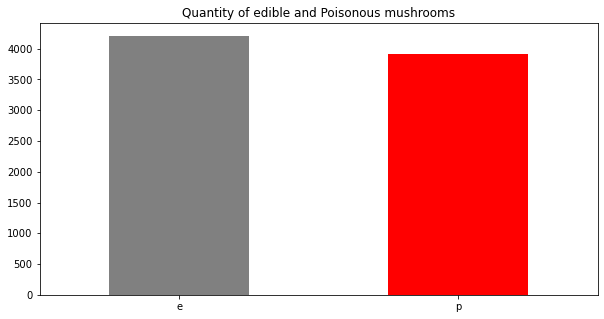

In [9]:
# Histogram plotting the disribution of edible and poisonous mushrooms in the dataset
df['class'].value_counts().plot.bar(figsize = (10,5), color = ['grey','red'])
plt.xticks(rotation=0)
plt.title('Quantity of edible and Poisonous mushrooms')
plt.xticks()
plt.yticks()
plt.show()

p= poisonous mushroom                             
e= edible mushroom

SPLITTING THE DATA TO FEATURE & TARGET

In [10]:
X= df.drop(['class'],axis=1)
y= df['class']

In [11]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


DATA PREPROCESSING

Here the dataset consits of categorical data which needs to be converted to numerical data.

Applying one hot encoding to the features(X) since the values are nominal.

One Hot Encoding:

In [12]:
X=pd.get_dummies(X) 
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Applying Standard Scaling on features

In [13]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
count,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,...,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03
mean,-7.070921e-15,2.037832e-15,1.264433e-14,-6.687966e-15,-5.169001e-15,-6.764653e-16,8.706313e-15,1.393666e-15,1.902803e-14,-5.463776e-15,...,1.947251e-14,8.723942e-16,-1.261664e-14,-2.651878e-14,5.804537e-15,7.013592e-15,-1.310780e-14,-1.259923e-14,-1.837478e-15,-1.045247e-14
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,...,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-2.427252e-01,-2.219484e-02,-7.962098e-01,-3.368781e-01,-6.288500e-02,-9.045790e-01,-6.322376e-01,-2.219484e-02,-6.775336e-01,-8.153245e-01,...,-4.260292e-01,-9.945985e-01,-5.167198e-01,-7.953846e-01,-5.995313e-01,-3.377834e-01,-1.930879e-01,-4.048418e-01,-2.178236e-01,-1.555820e-01
25%,-2.427252e-01,-2.219484e-02,-7.962098e-01,-3.368781e-01,-6.288500e-02,-9.045790e-01,-6.322376e-01,-2.219484e-02,-6.775336e-01,-8.153245e-01,...,-4.260292e-01,-9.945985e-01,-5.167198e-01,-7.953846e-01,-5.995313e-01,-3.377834e-01,-1.930879e-01,-4.048418e-01,-2.178236e-01,-1.555820e-01
50%,-2.427252e-01,-2.219484e-02,-7.962098e-01,-3.368781e-01,-6.288500e-02,-9.045790e-01,-6.322376e-01,-2.219484e-02,-6.775336e-01,-8.153245e-01,...,-4.260292e-01,-9.945985e-01,-5.167198e-01,-7.953846e-01,-5.995313e-01,-3.377834e-01,-1.930879e-01,-4.048418e-01,-2.178236e-01,-1.555820e-01
75%,-2.427252e-01,-2.219484e-02,1.255950e+00,-3.368781e-01,-6.288500e-02,1.105487e+00,1.581684e+00,-2.219484e-02,1.475942e+00,1.226505e+00,...,-4.260292e-01,1.005431e+00,-5.167198e-01,1.257253e+00,1.667970e+00,-3.377834e-01,-1.930879e-01,-4.048418e-01,-2.178236e-01,-1.555820e-01
max,4.119885e+00,4.505552e+01,1.255950e+00,2.968433e+00,1.590204e+01,1.105487e+00,1.581684e+00,4.505552e+01,1.475942e+00,1.226505e+00,...,2.347257e+00,1.005431e+00,1.935285e+00,1.257253e+00,1.667970e+00,2.960477e+00,5.178988e+00,2.470101e+00,4.590870e+00,6.427480e+00


In [14]:
#Target
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [15]:
y.value_counts()

e    4208
p    3916
Name: class, dtype: int64

LABEL ENCODING the target (y)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
y=pd.DataFrame(y)
y.head()

,0
0,1
1,0
2,0
3,1
4,0


SPLITTING TO TEST AND TRAIN

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.3)

GAUSSIAN NAIVE BAYES

In [18]:
#Fitting Gaussian Naive Bayes to the Training Set:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

#Prediction of the test set result:
y_pred=classifier.predict(X_test)

C:\Users\91944\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


EVALUATING WITH COFUSION MATRIX AND ACCURACY SCORE

In [19]:
#Making confusion matrix & Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.9626743232157506


array([[1167,   90],
       [   1, 1180]], dtype=int64)

BERNOULLIS NAIVE BAYES

In [20]:
#Fitting Bernoullis Naive Bayes to the Training Set:
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(X_train,y_train)

#Prediction of the test set result:
y_pred=classifier.predict(X_test)

C:\Users\91944\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


EVALUATING WITH COFUSION MATRIX AND ACCURACY SCORE

In [21]:
#Making confusion matrix & Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.9343724364232978


array([[1241,   16],
       [ 144, 1037]], dtype=int64)

LOGISTIC REGRESSION

In [22]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

C:\Users\91944\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

RANDOM FOREST CLASSIFIER

In [24]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())
y_pred=rf.predict(X_test)

In [25]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

DECISION TREE CLASSIFIER

In [26]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [27]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

SUPPORT VECTOR MACHINE

In [28]:
# 1. Linear SVM 
from sklearn.svm import SVC
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train, y_train.values.ravel())
y_pred = svm_linear.predict(X_test)

In [29]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

GRADIENT BOOSTING CLASSIFIER

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

C:\Users\91944\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


K NEAREST NEIGHBOR

In [36]:
from sklearn.neighbors import KNeighborsClassifier
acc_values =[]
neighbors= np.arange(1,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred)
    acc_values.append(acc)

<ipython-input-36-ba5f8aae63f8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-36-ba5f8aae63f8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-36-ba5f8aae63f8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-36-ba5f8aae63f8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-36-ba5f8aae63f8>:6: DataConversionWarning: A column-vector y was passed when a 1d

In [37]:
acc_values

[1.0,
 1.0,
 1.0,
 0.9995898277276456,
 0.9995898277276456,
 0.9995898277276456,
 0.9995898277276456,
 0.9987694831829368,
 0.9987694831829368,
 0.9987694831829368,
 0.9987694831829368]

Text(0, 0.5, 'Accuracy')

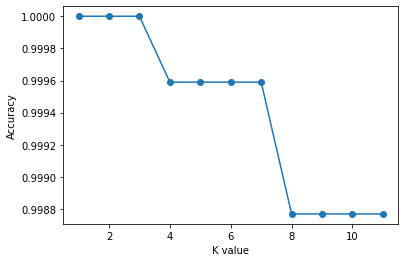

In [38]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [39]:
# Keeping K value as 3
classifier = KNeighborsClassifier(n_neighbors= 3, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

<ipython-input-39-10dd3e4d3738>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


In [40]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='macro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='macro'))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='macro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


C:\Users\91944\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


array([[1257,    0],
       [   0, 1181]], dtype=int64)

STEPS:


Dataset -mushroom.csv 

Here the dataset consist of categorical data.Hence the data had to be preprocessed by using  encoding techniques.
Encoding was done after splitting the data to features and target.
The features were One Hot encoded as the data was nominal.
The target was Label Encoded.
Standard scaling was applied to the features.
The data was then split into testing and training set and the following models were created and evaluated.

INFERRENCE:

The accuracy obtained for each models is as listed below.

Gaussian Naive - 96.26%

Bernoullis Naive Bayes - 93.43%

Logistic Regression -100%

Random Forest Calssifier -100%

Decision Tree -100%

SVM - 100%

Gradint Boosting -100%

KNN -100%

Here as we can see that apart from the Naive Bayes models all other models gave 100% accuracy. Hence we could use dimensionality reduction method like PCA so as to overcome this.

Among the Naive Bayes models, Gaussian Naive Bayes gave a better accuracy score of 96.26% when compared with the Bernoullis Naive Bayes (93.43%)
